#Introduction to Pandas

Pandas is a powerful and versatile library for data manipulation and analysis. Let's get started!

**Step 1: Installation**
Before you begin, make sure you have pandas installed. You can install it using pip:

```bash
pip install pandas
```

**Step 2: Importing pandas**
Start by importing the pandas library:

```python
import pandas as pd
```

**Step 3: Reading CSV Files**
Pandas makes it easy to read data from CSV files. The `read_csv()` function is used for this purpose. Let's say you have a CSV file named "data.csv":

```python
# Read CSV file
data = pd.read_csv('data.csv')
```

**Step 4: Exploring the Data**
Once you've loaded the data, you can perform various operations to explore it:

```python
# Display the first few rows of the DataFrame
print(data.head())

# Get information about the DataFrame
print(data.info())

# Summary statistics of numeric columns
print(data.describe())
```

**Step 5: Data Indexing and Selection**
Pandas provides powerful indexing and selection mechanisms:

```python
# Select a single column
column = data['ColumnName']

# Select multiple columns
columns = data[['Column1', 'Column2']]

# Select rows based on a condition
filtered_data = data[data['Column'] > 10]

# Using iloc for positional indexing
selected_row = data.iloc[2]  # Get the third row

```

**Step 6: Data Manipulation**
Pandas allows you to perform various data manipulation operations:

```python
# Adding a new column
data['NewColumn'] = data['Column1'] + data['Column2']

# Applying a function to a column
data['Column1'] = data['Column1'].apply(lambda x: x * 2)

# Grouping and aggregation
grouped = data.groupby('Category')['Column1'].mean()

# Sorting the DataFrame
sorted_data = data.sort_values(by='Column1', ascending=False)
```

**Step 7: Handling Missing Data**
Pandas provides methods to handle missing data:

```python
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
cleaned_data = data.dropna()

# Fill missing values with a specific value
data['Column1'].fillna(0, inplace=True)
```

These are just some of the basic operations you can perform using pandas. The library offers a wide range of functions for more complex data analysis, manipulation, and visualization tasks. You can check the [documentation](https://pandas.pydata.org/docs/).

#Linear Regression

Linear regression uses the very basic idea of prediction. Here is the formula:

Y = BX + C

This is the equation of a straight line. Here, Y is the dependent variable, B is the slope and C is the intercept. Typically, for linear regression, it is written as:

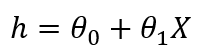


Here, ‘h’ is the hypothesis or the predicted dependent variable, X is the input feature, and theta0 and theta1 are the coefficients. Theta values are initialized randomly to start with. Then using gradient descent, we will update the theta value to minimize the cost function. Here is the explanation of cost function and gradient descent.

Cost Function and Gradient Descent
Cost function determines how far the prediction is from the original dependent variable. Here is the formula for that

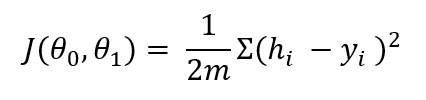

The idea of any machine learning algorithm is to minimize the cost function so that the hypothesis is close to the original dependent variable. We need to optimize the theta value to do that. If we take the partial derivative of the cost function based on theta0 and theta1 respectively, we will get the gradient descent. To update the theta values we need to deduct the gradient descent from the corresponding theta values:

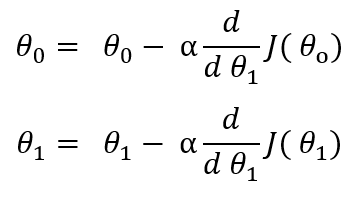

After the partial derivative, the formulas above will turn out to be:

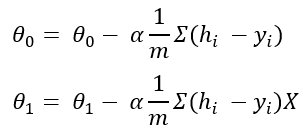

Here, m is the number of training data and alpha is the learning rate. We are talking about one variable linear regression. That’s why we have only two theta values. If there are many variables, there will be theta values for each variable.

Import the packages and the dataset.

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [ ]:
df.columns

Index(['x', 'y'], dtype='object')

####Data Preprocessing

Changing title of columns for easiness.

In [ ]:
df.columns = [0,1]

In [ ]:
# Finding number of zeroes in all columns
for column_name in df.columns:
    column = df[column_name]
    # counting zeros in column
    count = (column == 0).sum()
    print('Zeros in', column_name, 'is:', count)

Zeros in 0 is: 8
Zeros in 1 is: 0


In [ ]:
# Count number of nan in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of nan in column
    count = sum(pd.isnull(column))
    print('Count of NaN in column ', column_name, ' is : ', count)

Count of NaN in column  0  is :  0
Count of NaN in column  1  is :  0


In [ ]:
# replace 0 with nan
df[0] = df[0].replace(0, np.nan)
df[1] = df[1].replace(0, np.nan)

In [ ]:
# Finding number of rows with missing values
df.isnull().any(axis=1).sum()

8

In [ ]:
# drop row if missing value present in that row
df_dropped = df.dropna()
print(df_dropped.shape)

(691, 2)


In [ ]:
# count number of rows
count_row = df_dropped.shape[0]
print(count_row)

691



We can also fill missing values with mean of that column
```
for col in df.columns:
  mean_value = df[col].mean()
  df_mean = df.fillna(value=mean_value, inplace=False)
  
# number of rows with missing values
df_mean.isnull().any(axis=1).sum()
```



In [ ]:
# copy the data
df_min_max_scaled = df_dropped.copy()

# apply normalization techniques
for column in df_dropped.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

# view normalized data
print(df_min_max_scaled)

            0         1
0    0.232323  0.225260
1    0.494949  0.455183
2    0.141414  0.186836
3    0.373737  0.358671
4    0.868687  0.808515
..        ...       ...
694  0.575758  0.553936
695  0.929293  0.873602
696  0.818182  0.820180
697  0.656566  0.598773
698  0.969697  0.876709

[691 rows x 2 columns]


In this dataset, column zero is the input feature and column 1 is the output variable or dependent variable. We will use column 0 to predict column 1 using the straight-line formula above.

 Initialize the theta values.

In [ ]:
theta = [0,0]

Define the hypothesis and the cost function as per the formulas discussed before.

In [ ]:
def hypothesis(theta, X):
    return theta[0] + theta[1]*X

In [ ]:
m = len(df)     #Calculate the number of training data as the length of the DataFrame.
def cost_calc(theta, X, y):
    return (1/2*m) * np.sum((hypothesis(theta, X) - y)**2)

Define the function for gradient descent. In this function, we will update the theta values until the cost function is it’s minimum. It may take any number of iteration. In each iteration, it will update the theta values and with each updated theta values we will calculate the cost to keep track of the cost.

In [ ]:
def gradient_descent(theta, X, y, epoch, alpha):
    cost = []
    i = 0
    while i < epoch:
        hx = hypothesis(theta, X)
        theta[0] -= alpha*(np.sum(hx-y)/m)
        theta[1] -= (alpha * np.sum((hx - y) * X))/m
        cost.append(cost_calc(theta, X, y))
        i += 1
    return theta, cost

Finally, define the predict function. It will get the updated theta from gradient descent function and predict the hypothesis or the predicted output variable.

In [ ]:
def predict(theta, X, y, epoch, alpha):
    theta, cost = gradient_descent(theta, X, y, epoch, alpha)
    return hypothesis(theta, X), cost, theta

Using the predict function, find the hypothesis, cost, and updated theta values. Let us choose the learning rate as 0.01 and lets run this algorithm for 2000 epochs or iterations.

In [ ]:
y_predict, cost, theta_f = predict(theta, df_min_max_scaled[0], df_min_max_scaled[1], 2000, 0.01)

Plot the original y and the hypothesis or the predicted y in the same graph.

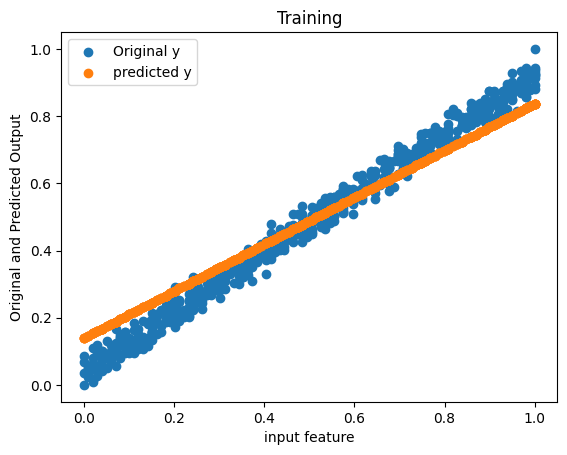

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df_min_max_scaled[0], df_min_max_scaled[1], label = 'Original y')
plt.scatter(df_min_max_scaled[0], y_predict, label = 'predicted y')
plt.legend(loc = "upper left")
plt.xlabel("input feature")
plt.ylabel("Original and Predicted Output")
plt.title("Training")
plt.show()

The hypothesis plot is a straight line as expected from the formula and the line is passing through in an optimum position.

Let’s plot the cost function.

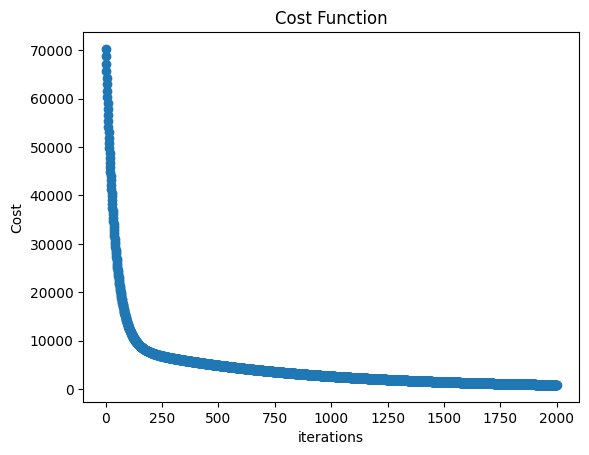

In [ ]:
plt.figure()
plt.scatter(range(0, len(cost)), cost)
plt.title("Cost Function")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

####Evaluation Metric
Coefficient of Determination($R^2$)


\begin{align} R^2&=1-\frac{\text{sum squared regression (SSR)}}{\text{total sum of squares (SST)}},\\ &=1-\frac{\sum({y_i}-\hat{y_i})^2}{\sum(y_i-\bar{y})^2}. \end{align}


In [ ]:
def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [ ]:
r2_score = r_squared(df_min_max_scaled[1], y_predict)
print("R-squared:", r2_score)

R-squared: 0.9476941835072328


###Test

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.columns = [0,1]

In [ ]:
y_predict_test = hypothesis(theta_f,df_min_max_scaled_test[0])

###Questions


*   Apply Linear regression in the given [dataset](https://www.kaggle.com/datasets/smid80/weatherww2) for attributes MaxTemp and MinTemp.
You can use given code to extract columns from dataframe. Preprocessing will be required.

```
#You can use below implementation to extract the required columns
# Assuming 'df' is your DataFrame
selected_columns = ['column_name1', 'column_name2']
new_df = df[selected_columns]
```



```
#You can use below implementation to divide a dataset into train and test.
num_samples = df_min_max_scaled.shape[0]
num_train_samples = int(0.98 * num_samples) #dividing training and testing in 98:2.

indices = np.random.permutation(num_samples)

training_idx, test_idx = indices[:num_train_samples], indices[num_train_samples:]
training = df_min_max_scaled.iloc[training_idx,:]
test =  df_min_max_scaled.iloc[test_idx,:]
```

  *   Find Coefficient of Determination for both training and testing.

  *   Plot the linear regression and loss curve.


#Logistic Regression

<a name='1'></a>
## 1 - Packages ##

- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.

In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

<a name='2'></a>
## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm based on logistic regression that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [ ]:
def load_dataset():
    with h5py.File('train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        tuest_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images.

y = [0], it's a 'non-cat' picture.


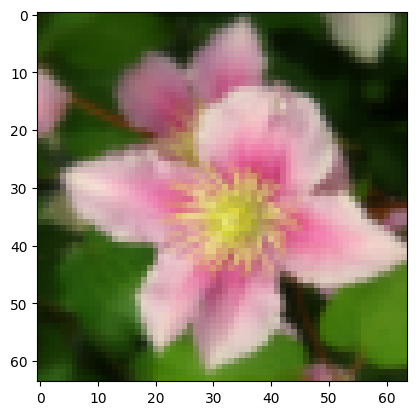

In [ ]:
# Example of a picture
index = 85
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.

<a name='ex-1'></a>
### Exercise 1
Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

<a name='ex-2'></a>
### Exercise 2
Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use:
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !-->

Let's standardize our dataset.

<font color='blue'>
    
    
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

<a name='3'></a>
## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

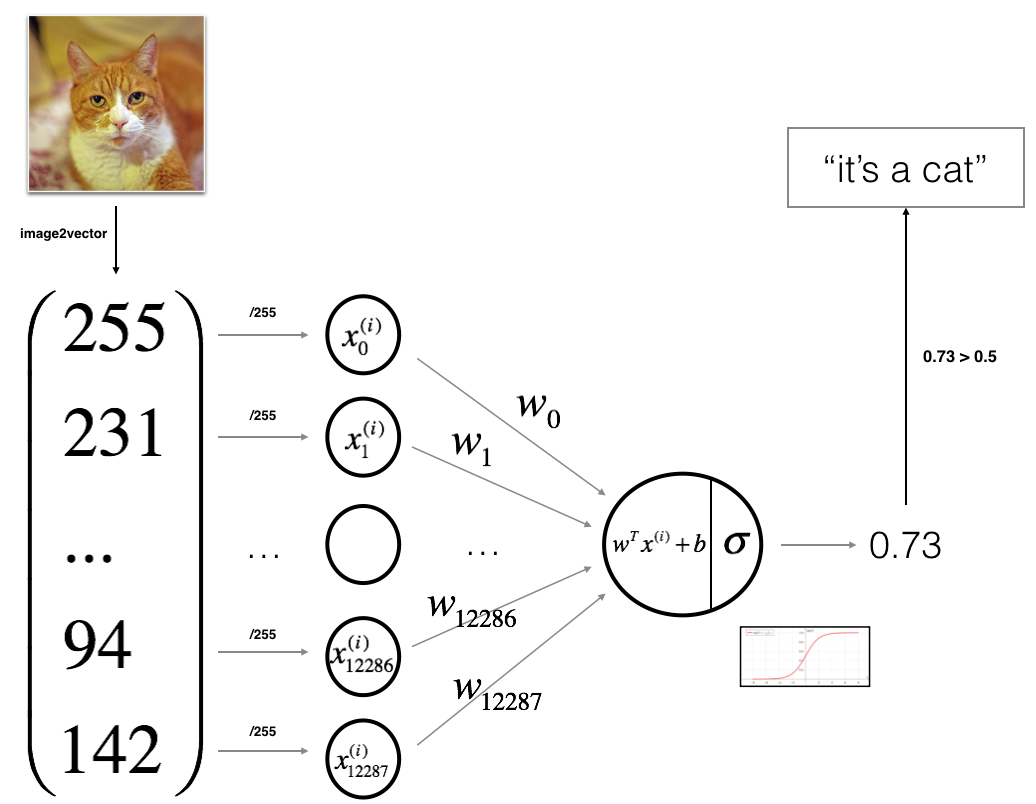

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps:
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

<a name='4'></a>
## 4 - Building the parts of our algorithm ##

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

<a name='4-1'></a>
### 4.1 - Helper functions

<a name='ex-3'></a>
### Exercise 3 - sigmoid
Implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions. Use np.exp().

In [ ]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """


<a name='4-2'></a>
### 4.2 - Initializing parameters

<a name='ex-4'></a>
### Exercise 4 - initialize_with_zeros
Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [ ]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """



<a name='4-3'></a>
### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

<a name='ex-5'></a>
### Exercise 5 - propagate
Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [ ]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """



<a name='4-4'></a>
### 4.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

<a name='ex-6'></a>
### Exercise 6 - optimize
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [ ]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """


<a name='ex-7'></a>
### Exercise 7 - predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this).

In [ ]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''


<font color='blue'>
    
**What to remember:**
    
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - Computing the cost and its gradient
    - Updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

<a name='5'></a>
## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

<a name='ex-8'></a>
### Exercise 8 - model
Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - parameters, grads, costs for the outputs of optimize()

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)
    # initialize parameters with zeros
    # w, b = ...

    # Gradient descent

    # Predict test/train set examples


If you pass all the tests, run the following cell to train your model.

**Comment**: See that the model is clearly overfitting the training data.

y = 0, you predicted that it is a "cat" picture.


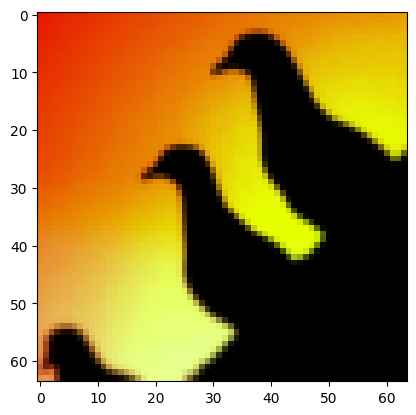

In [ ]:
# Example of a picture that was wrongly classified.


Let's also plot the cost function and the gradients.

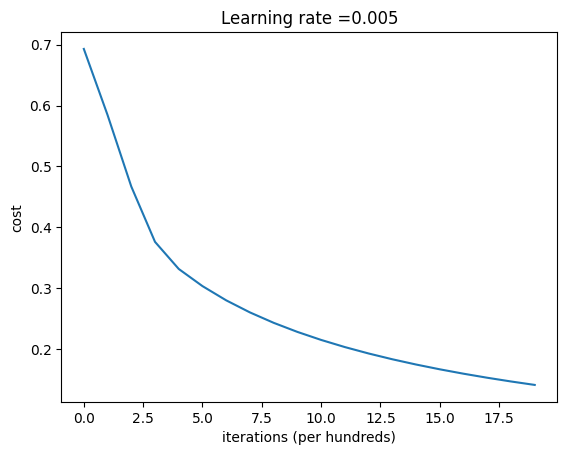

In [ ]:
# Plot learning curve (with costs)


**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting.

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below.  Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens.

**Interpretation**:
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost).
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you:
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting.


<font color='blue'>
    
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm.

#References

*   [Linear regresion from scratch](https://regenerativetoday.com/)
*   [Neural Networks and Deep Learning](https://www.coursera.org/learn/neural-networks-deep-learning/)

